In [ ]:
import numpy as np
from sklearn.datasets import load_digits
from scipy.spatial.distance import pdist
from sklearn.manifold.t_sne import _joint_probabilities
from scipy import linalg
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import squareform
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
palette = sns.color_palette("bright", 10)

ModuleNotFoundError: ignored

In [13]:
import pandas as pd
data=pd.read_csv('normalised.csv')
#pd.set_option('display.max_columns',None)
data.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,16373,16374,16375,16376,16377,16378,16379,16380,16381,16382
0,0,0.090355,0.000000,0.047287,0.262330,0.035489,0.029486,0.208684,0.090770,0.0,...,0.013901,0.001592,0.0,0.045672,0.221676,0.106226,0.115470,0.019213,0.033896,0.044969
1,1,0.021684,0.000000,0.033631,0.334136,0.002082,0.164379,0.131510,0.234319,0.0,...,0.066644,0.001027,0.0,0.050144,0.040873,0.102296,0.050594,0.016721,0.024807,0.043532
2,2,0.020527,0.001546,0.003445,0.312104,0.000864,0.030186,0.057641,0.064803,0.0,...,0.011343,0.004262,0.0,0.066783,0.067828,0.177813,0.104165,0.036059,0.033945,0.000000
3,3,0.021226,0.000000,0.007056,0.347426,0.000737,0.061489,0.120033,0.082960,0.0,...,0.014521,0.000364,0.0,0.087252,0.028942,0.122465,0.237842,0.023109,0.077159,0.020551
4,4,0.056823,0.000000,0.000944,0.537798,0.001973,0.060629,0.118271,0.000000,0.0,...,0.332277,0.001558,0.0,0.149607,0.092957,0.178844,0.250246,0.012676,0.095940,0.297005


In [ ]:
data.describe()

,A1BG|1,A1CF|29974,A2BP1|54715,A2LD1|87769,A2ML1|144568,A2M|2,A4GALT|53947,A4GNT|51146,AAA1|404744,AAAS|8086,...,SLC6A3|6531,SLC6A4|6532,SLC6A5|9152,SLC6A6|6533,SLC6A7|6534,SLC6A8|6535,SLC6A9|6536,SLC7A10|56301,SLC7A11|23657,SLC7A13|157724
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,...,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000
mean,64.773957,3.590567,15.410773,160.365759,35.546997,13727.783731,583.042428,0.337941,0.008565,859.881484,...,15.545567,8.125066,0.010714,317.556055,1.097827,1754.379172,115.424162,1.700273,262.355746,3.200598
std,76.848046,18.315702,33.512141,70.512812,81.104631,12234.222580,380.550035,0.560213,0.065604,193.796880,...,34.414235,57.188283,0.074295,208.389904,1.552853,623.108994,57.088018,4.116536,265.120523,5.111657
min,2.164500,0.000000,0.000000,15.044100,0.000000,1511.217100,53.936300,0.000000,0.000000,412.081300,...,0.000000,0.000000,0.000000,14.708200,0.000000,695.024100,19.793100,0.000000,10.777500,0.000000
25%,22.327125,0.000000,2.352875,106.437675,5.365725,6502.051775,346.828700,0.000000,0.000000,740.295700,...,1.627275,0.849475,0.000000,177.167300,0.000000,1358.648025,77.947925,0.433175,107.109750,0.466000
50%,41.160650,0.000000,7.218650,147.767300,14.687300,10426.711600,507.692100,0.000000,0.000000,841.497450,...,4.336650,1.743600,0.000000,277.756450,0.652900,1636.133100,105.484850,0.961950,197.978750,1.564250
75%,74.030250,0.433400,15.760575,199.717900,35.152750,17206.441225,709.702750,0.501625,0.000000,959.865475,...,12.035100,4.850525,0.000000,414.557400,1.435575,1955.593625,136.963075,1.757225,329.851300,3.792550
max,729.903900,237.832900,533.582100,476.299200,1276.867000,113991.666100,3474.556200,5.672600,0.745200,1710.851000,...,259.292300,1293.891500,0.993500,2624.079700,16.260200,7167.721200,488.621800,82.279100,3354.010100,45.803000


In [14]:
dat=data.iloc[:,1:]
dat.head()

,0,1,2,3,4,5,6,7,8,9,...,16373,16374,16375,16376,16377,16378,16379,16380,16381,16382
0,0.090355,0.000000,0.047287,0.262330,0.035489,0.029486,0.208684,0.090770,0.0,0.393202,...,0.013901,0.001592,0.0,0.045672,0.221676,0.106226,0.115470,0.019213,0.033896,0.044969
1,0.021684,0.000000,0.033631,0.334136,0.002082,0.164379,0.131510,0.234319,0.0,0.391974,...,0.066644,0.001027,0.0,0.050144,0.040873,0.102296,0.050594,0.016721,0.024807,0.043532
2,0.020527,0.001546,0.003445,0.312104,0.000864,0.030186,0.057641,0.064803,0.0,0.299814,...,0.011343,0.004262,0.0,0.066783,0.067828,0.177813,0.104165,0.036059,0.033945,0.000000
3,0.021226,0.000000,0.007056,0.347426,0.000737,0.061489,0.120033,0.082960,0.0,0.359271,...,0.014521,0.000364,0.0,0.087252,0.028942,0.122465,0.237842,0.023109,0.077159,0.020551
4,0.056823,0.000000,0.000944,0.537798,0.001973,0.060629,0.118271,0.000000,0.0,0.465960,...,0.332277,0.001558,0.0,0.149607,0.092957,0.178844,0.250246,0.012676,0.095940,0.297005


In [15]:
from sklearn import preprocessing

x = dat.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
dat = pd.DataFrame(x_scaled)

In [6]:
print(dat.head)

<bound method NDFrame.head of         0         1         2         3         4         5         6      \
0    0.090355  0.000000  0.047287  0.262330  0.035489  0.029486  0.208684   
1    0.021684  0.000000  0.033631  0.334136  0.002082  0.164379  0.131510   
2    0.020527  0.001546  0.003445  0.312104  0.000864  0.030186  0.057641   
3    0.021226  0.000000  0.007056  0.347426  0.000737  0.061489  0.120033   
4    0.056823  0.000000  0.000944  0.537798  0.001973  0.060629  0.118271   
..        ...       ...       ...       ...       ...       ...       ...   
545  0.042440  0.000000  0.005604  0.071348  0.051185  0.062719  0.068776   
546  0.088042  0.000000  0.024388  0.240999  0.053309  0.199919  0.275845   
547  0.018200  0.000000  0.000000  0.253530  0.013677  0.119694  0.095351   
548  0.039796  0.000000  0.000000  0.733243  0.024918  0.031441  0.117084   
549  0.065562  0.376009  0.026759  0.220974  0.047083  0.114917  0.118685   

        7      8         9      ...     16373

In [7]:
dat.to_csv('normalised.csv')

In [ ]:
pip install gseapy

     |████████████████████████████████| 526 kB 5.2 MB/s 
     |████████████████████████████████| 1.0 MB 35.4 MB/s 
     |████████████████████████████████| 47 kB 4.0 MB/s 
     |████████████████████████████████| 47 kB 3.8 MB/s 
     |████████████████████████████████| 144 kB 62.9 MB/s 
     |████████████████████████████████| 5.8 MB 35.5 MB/s 
     |████████████████████████████████| 251 kB 46.1 MB/s 
     |████████████████████████████████| 127 kB 46.5 MB/s 
  Created wheel for bioservices: filename=bioservices-1.8.4-py3-none-any.whl size=231822 sha256=db668a42a4e151d78022c51755cb760987a879d6b7b0fa20dde6d6478f297256
  Stored in directory: /root/.cache/pip/wheels/68/df/3c/0ed23eeeafac858b6d4d3ec54d90d58e9292628b50d43bcd0f
  Created wheel for easydev: filename=easydev-0.12.0-py3-none-any.whl size=64232 sha256=d1cb47da73fedf6dce0f8bdb7ca333784a2ff15e44a957291887e75e473e9c66
  Stored in directory: /root/.cache/pip/wheels/82/ab/83/fdfc4017ea44a585b6754752cc5f63f2d0d63fcc1317e7174b
Successfully 

In [16]:
from sklearn.manifold import TSNE

In [9]:
tsne = TSNE(n_components=2, verbose=1, random_state=123)
z = tsne.fit_transform(dat) 

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 550 samples in 0.005s...
[t-SNE] Computed neighbors for 550 samples in 0.187s...
[t-SNE] Computed conditional probabilities for sample 550 / 550
[t-SNE] Mean sigma: 4.257687
[t-SNE] KL divergence after 250 iterations with early exaggeration: 89.495689
[t-SNE] KL divergence after 1000 iterations: 1.228872


In [ ]:
cd

/root


In [12]:
import seaborn as sns
df = pd.DataFrame()
df["y"] = z[:2]
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 10),
                data=df).set(title="MNIST data T-SNE projection")
 

ValueError: ignored

In [17]:
m=TSNE(learning_rate=20)
tsne_feautures = m.fit_transform(dat)
df['x']=tsne_feautures[:,0]
df['y']=tsne_feautures[:,1]

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


<function matplotlib.pyplot.show>

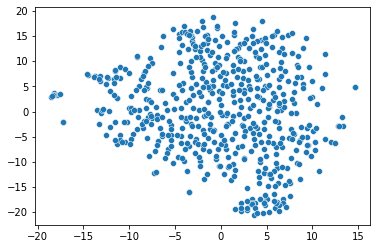

In [22]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.scatterplot(x=tsne_feautures[:,0], y=tsne_feautures[:,1],data=dat)
plt.show